In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/train.csv')
print(df)

            id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  

In [ ]:
df = df.drop(['Surname', 'Geography','Gender','IsActiveMember'], axis=1)
print(df)

            id  CustomerId  CreditScore   Age  Tenure    Balance  \
0            0    15674932          668  33.0       3       0.00   
1            1    15749177          627  33.0       1       0.00   
2            2    15694510          678  40.0      10       0.00   
3            3    15741417          581  34.0       2  148882.54   
4            4    15766172          716  33.0       5       0.00   
...        ...         ...          ...   ...     ...        ...   
165029  165029    15667085          667  33.0       2       0.00   
165030  165030    15665521          792  35.0       3       0.00   
165031  165031    15664752          565  31.0       5       0.00   
165032  165032    15689614          554  30.0       7  161533.00   
165033  165033    15732798          850  31.0       1       0.00   

        NumOfProducts  HasCrCard  EstimatedSalary  Exited  
0                   2        1.0        181449.97       0  
1                   2        1.0         49503.50       0  
2  

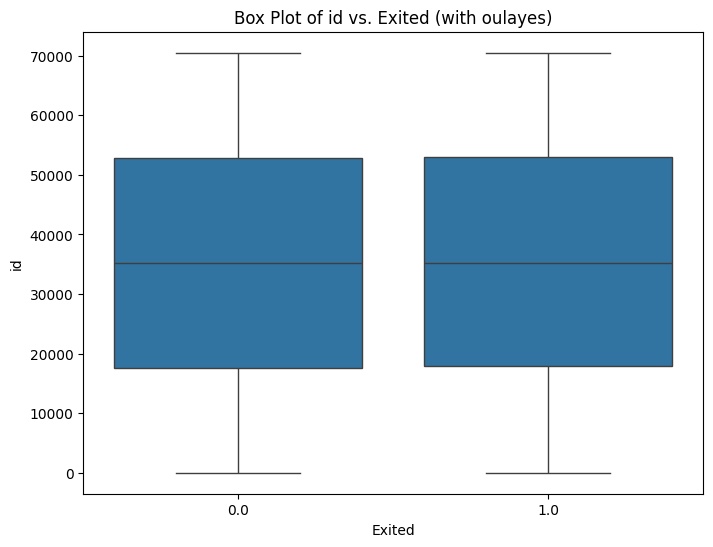

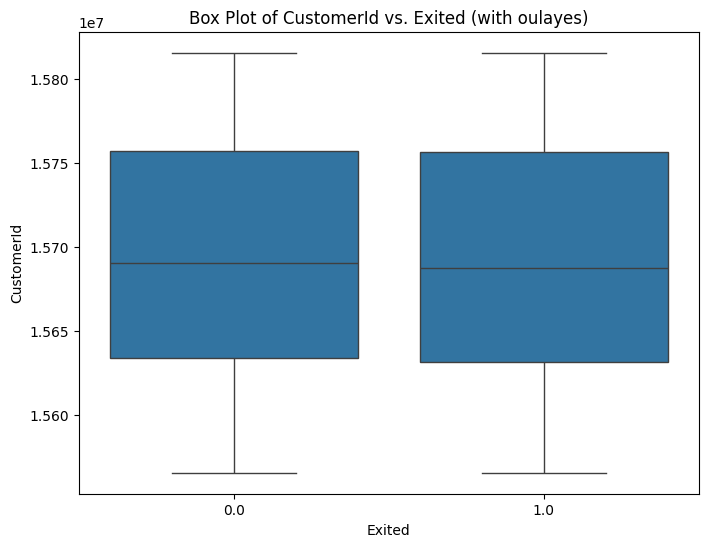

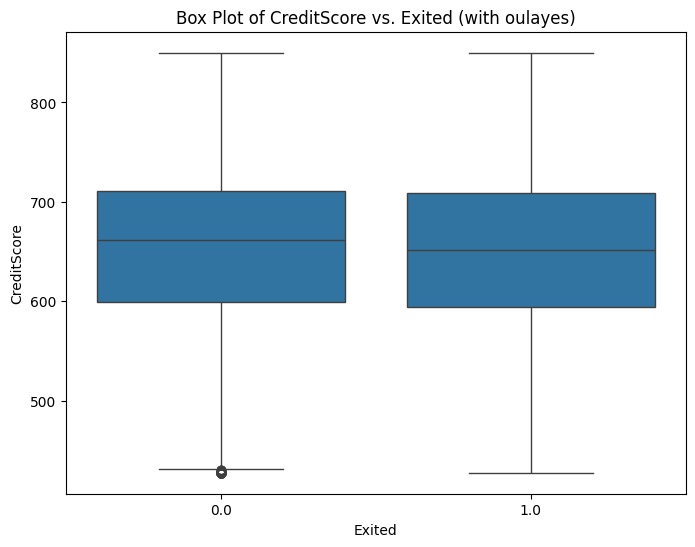

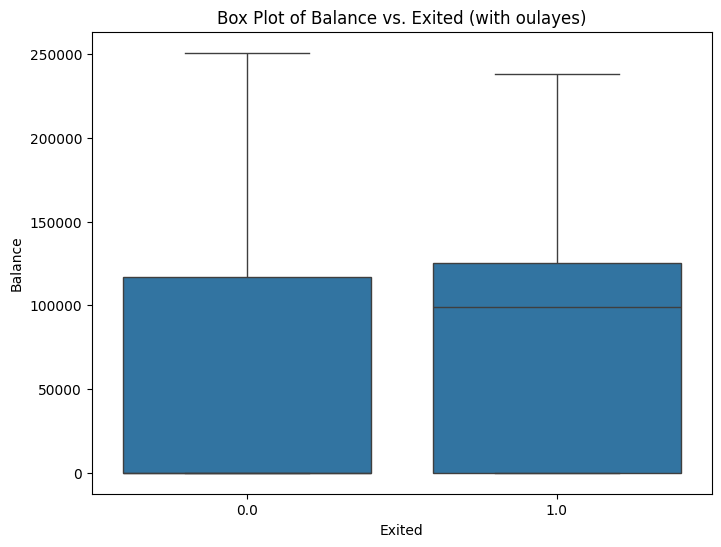

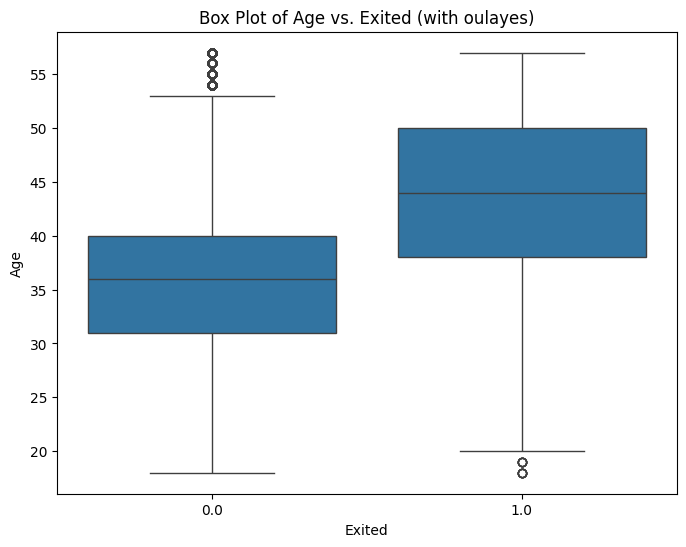

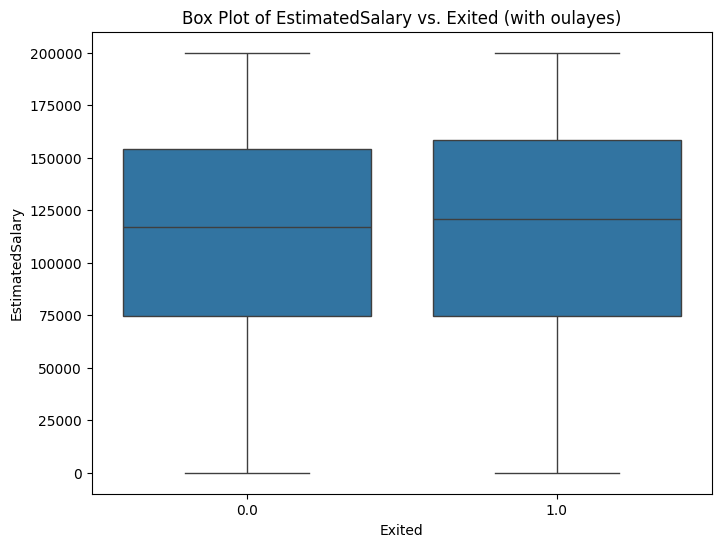

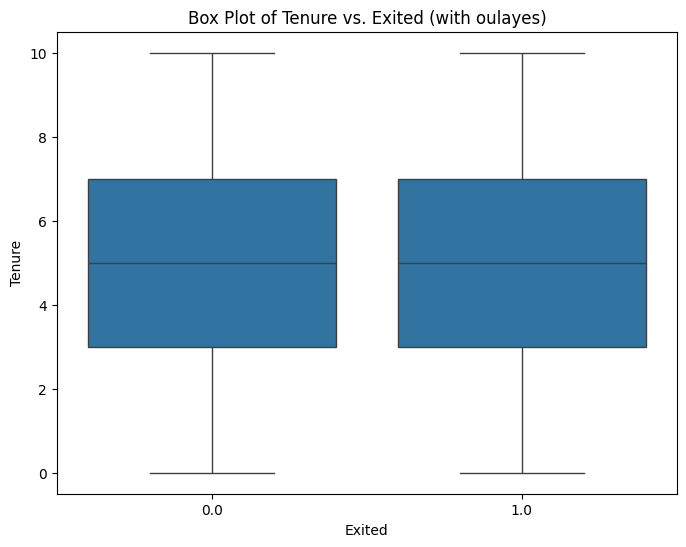

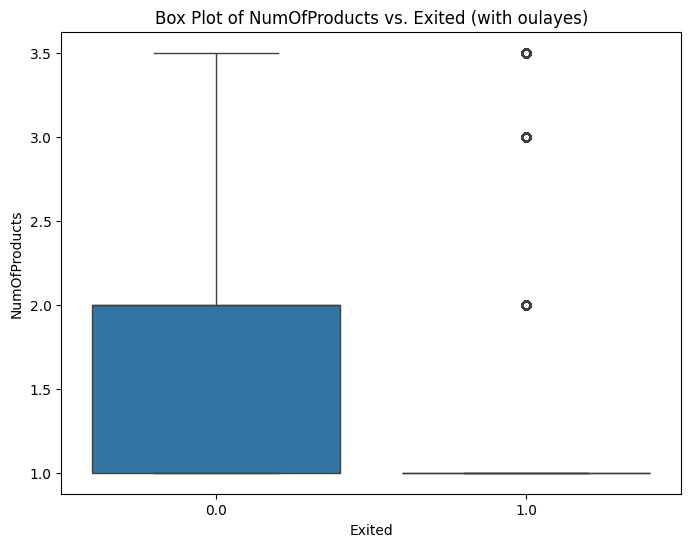

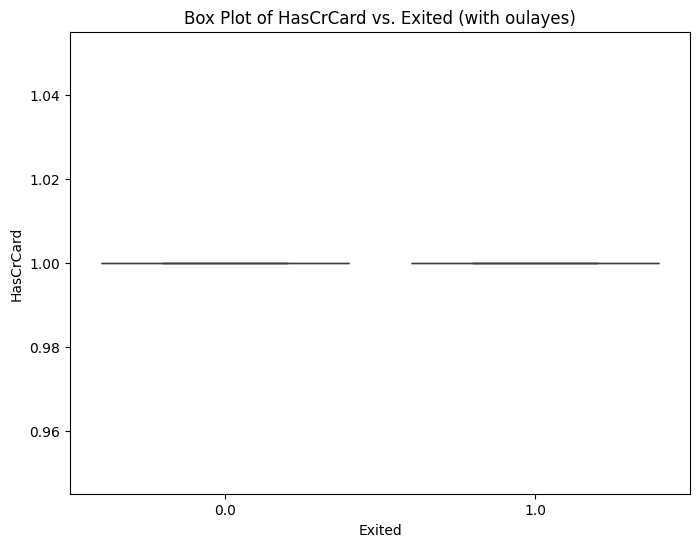

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
numerical_features = ['id','CustomerId','CreditScore','Balance','Age','EstimatedSalary','Tenure','NumOfProducts','HasCrCard']
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df
for feature in numerical_features:
    df = handle_outliers_iqr(df, feature)

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exited', y=feature, data=df, showfliers=True)
    plt.title(f'Box Plot of {feature} vs. Exited (with oulayes)')
    plt.xlabel('Exited')
    plt.ylabel(feature)
    plt.show()

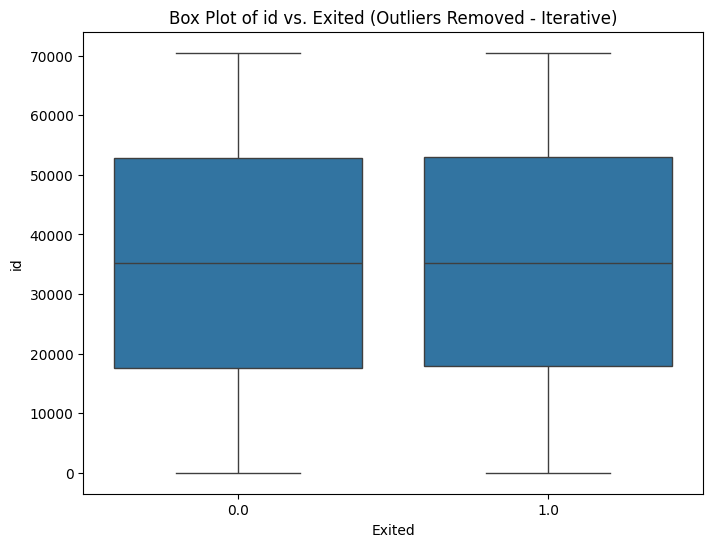

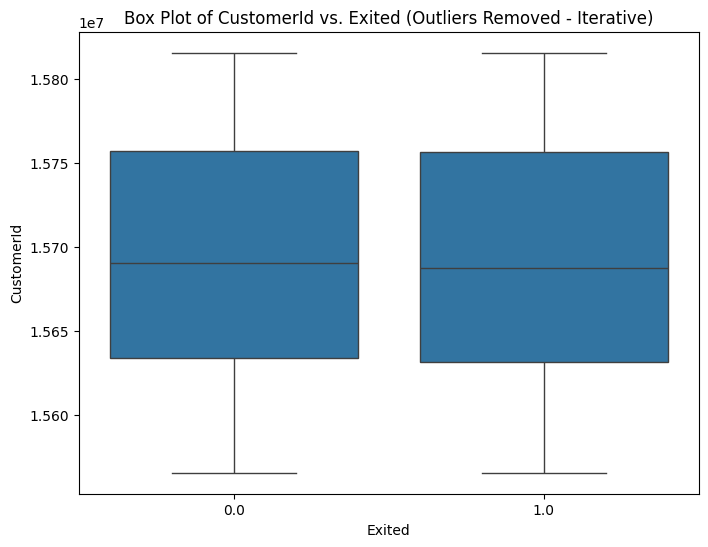

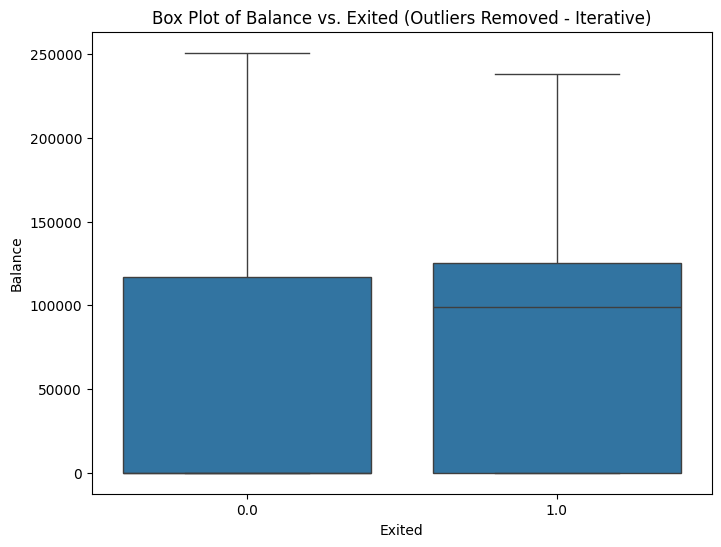

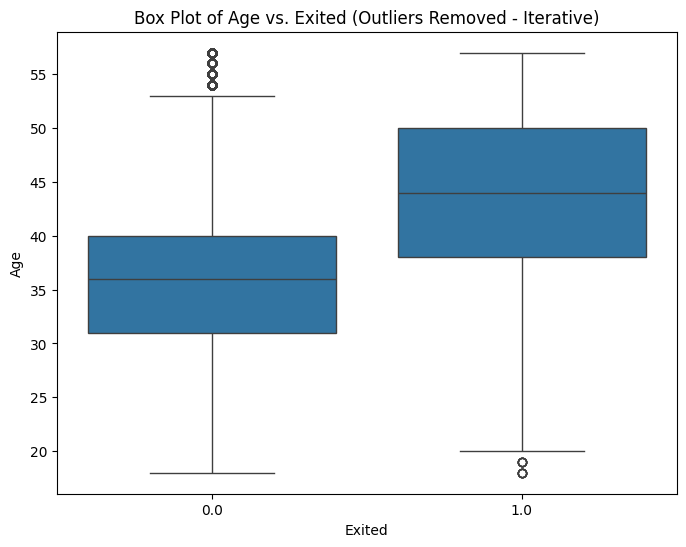

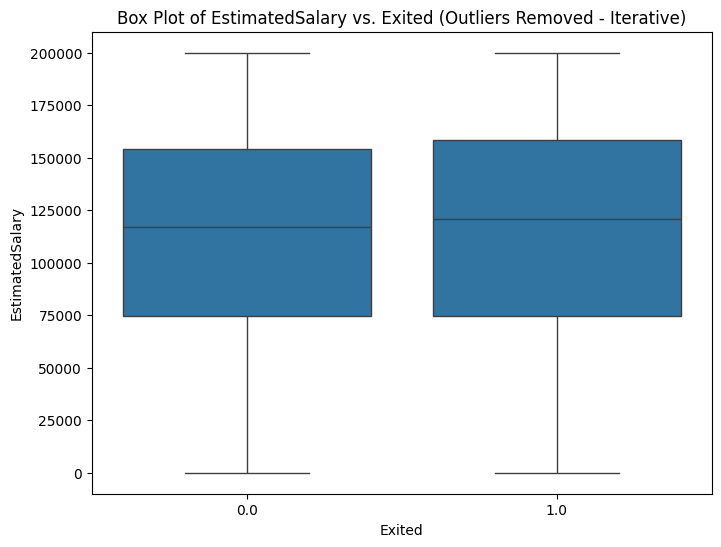

In [ ]:
numerical_features = ['id', 'CustomerId', 'Balance', 'Age', 'EstimatedSalary']
def handle_outliers_iqr_iterative(df, column, iterations=3):
    for _ in range(iterations):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

a = df.copy()
for feature in numerical_features:
    a = handle_outliers_iqr_iterative(a, feature)
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exited', y=feature, data=a, showfliers=True)
    plt.title(f'Box Plot of {feature} vs. Exited (Outliers Removed - Iterative)')
    plt.xlabel('Exited')
    plt.ylabel(feature)
    plt.show()

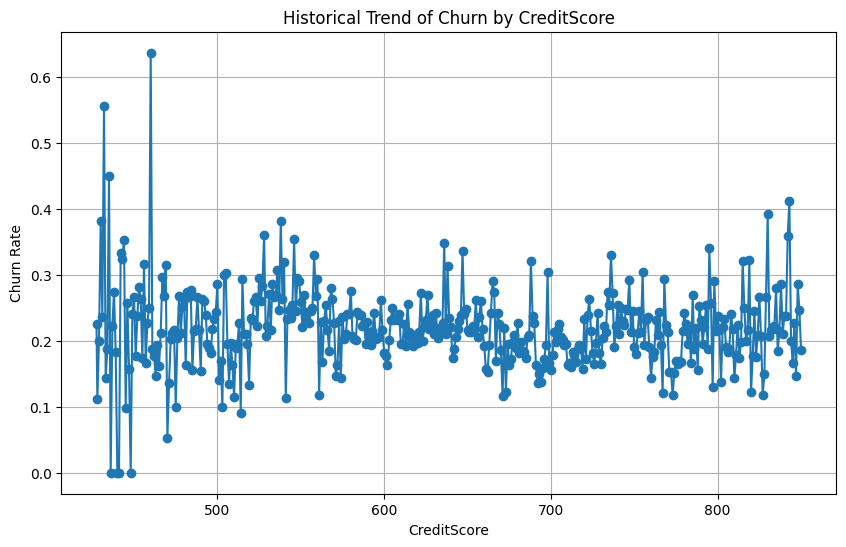

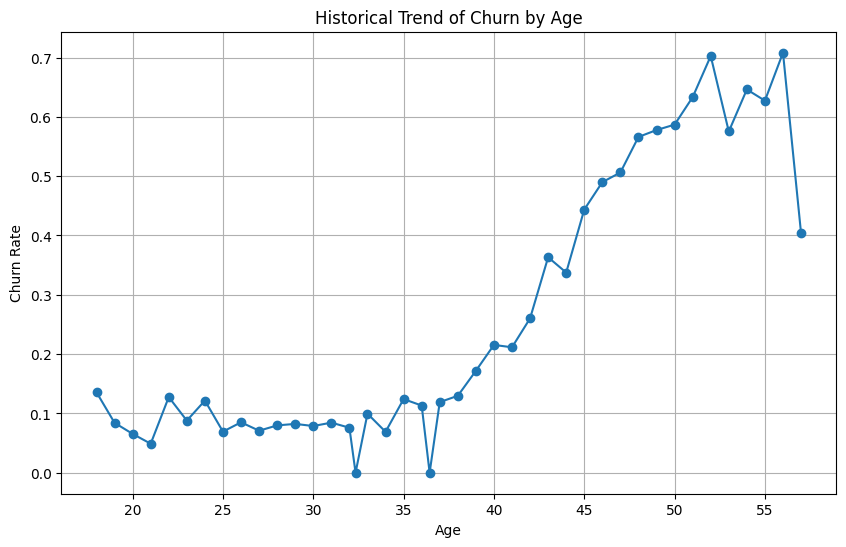

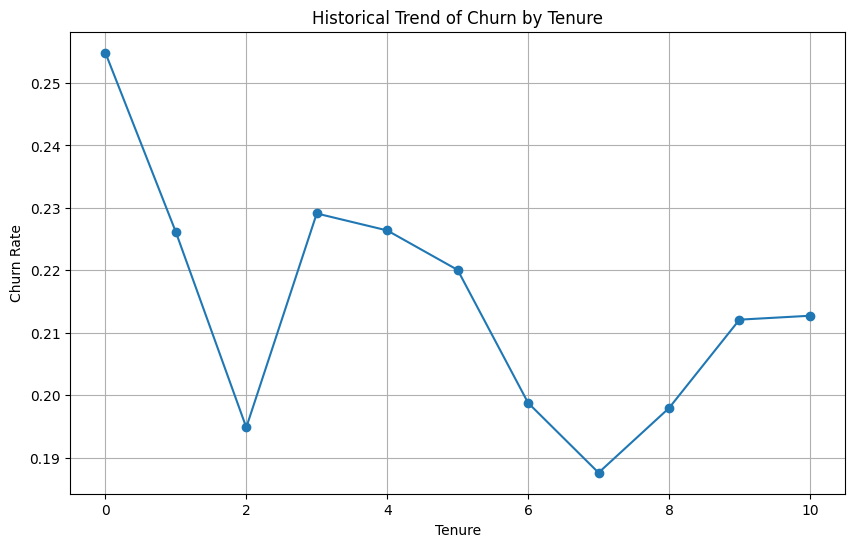

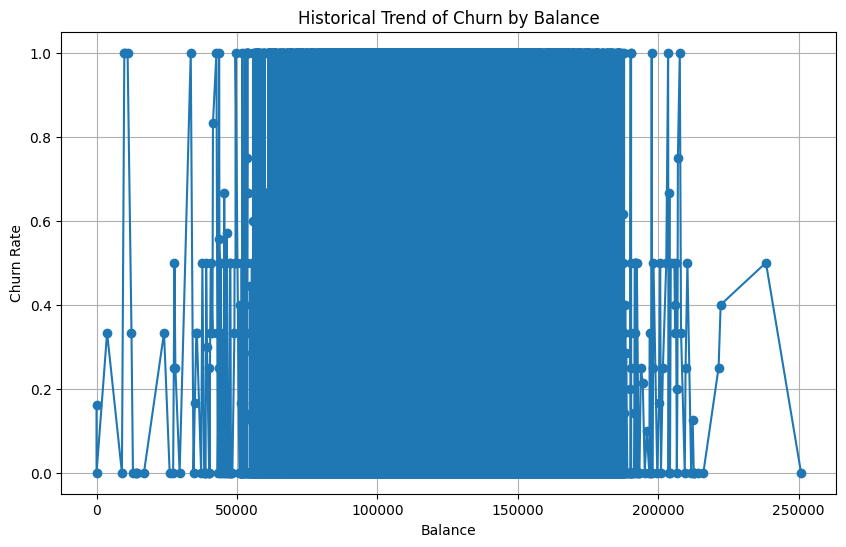

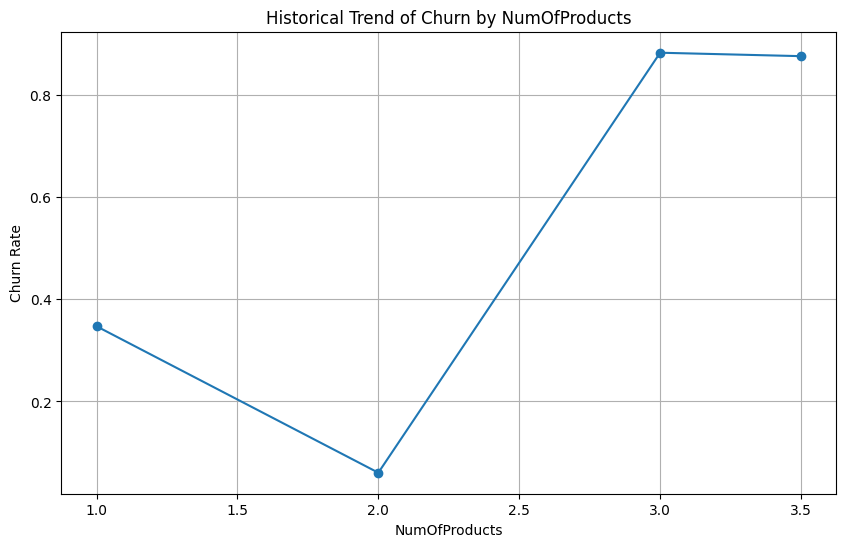

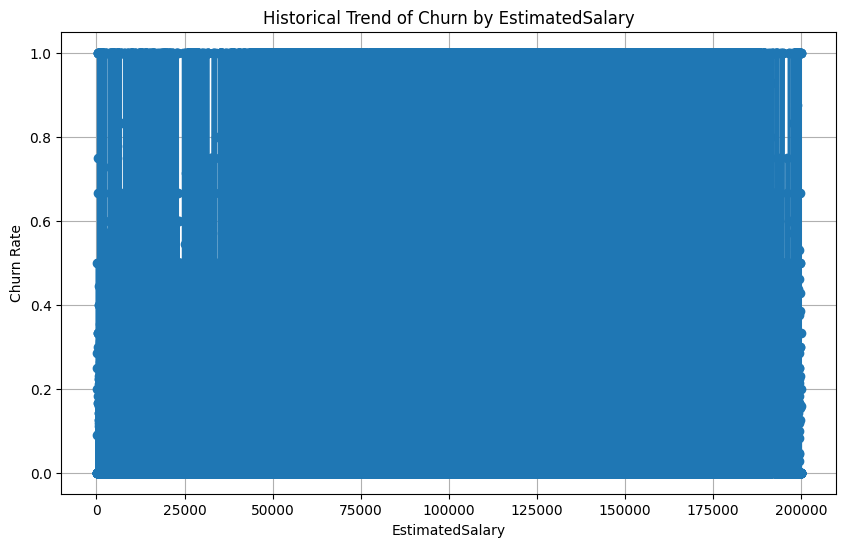

In [ ]:
#historical graph
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in numerical_features:
    churn_by_feature = a.groupby(feature)['Exited'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    plt.plot(churn_by_feature[feature], churn_by_feature['Exited'], marker='o', linestyle='-')
    plt.title(f'Historical Trend of Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate')
    plt.grid(True)
    plt.show()

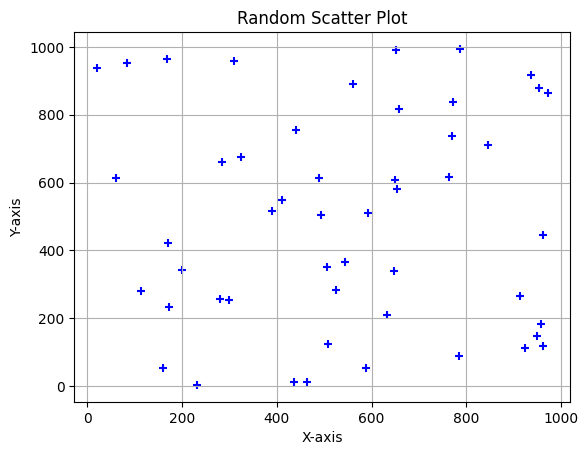

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randint(0, 1000, 50)
y = np.random.randint(0, 1000, 50)

plt.scatter(x, y, marker='+', color='blue')

plt.title("Random Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.grid(True)

plt.show()

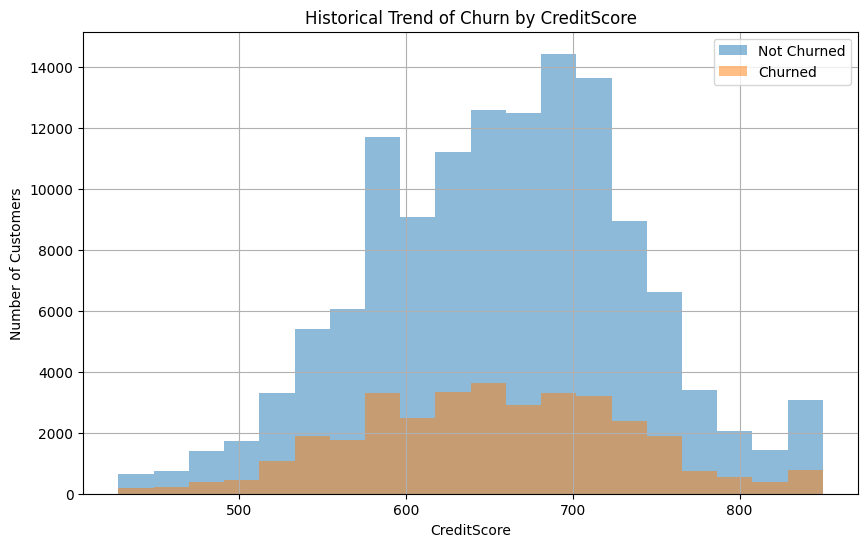

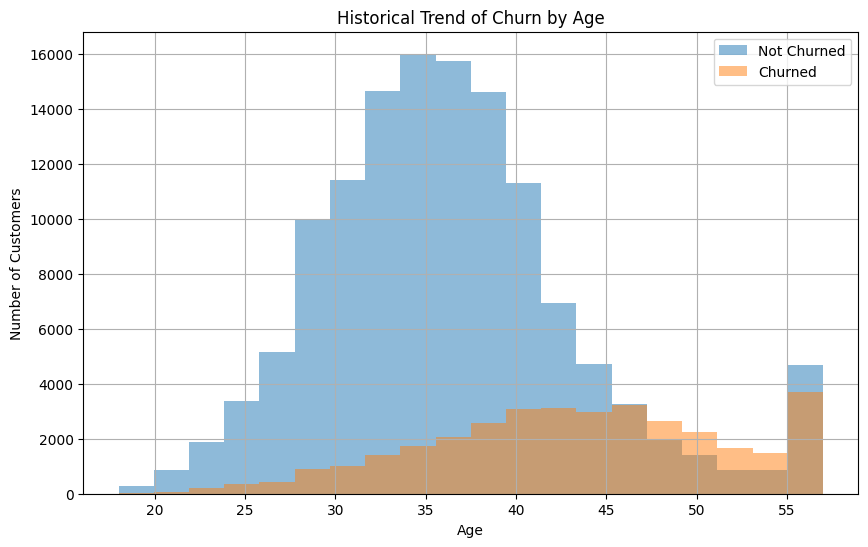

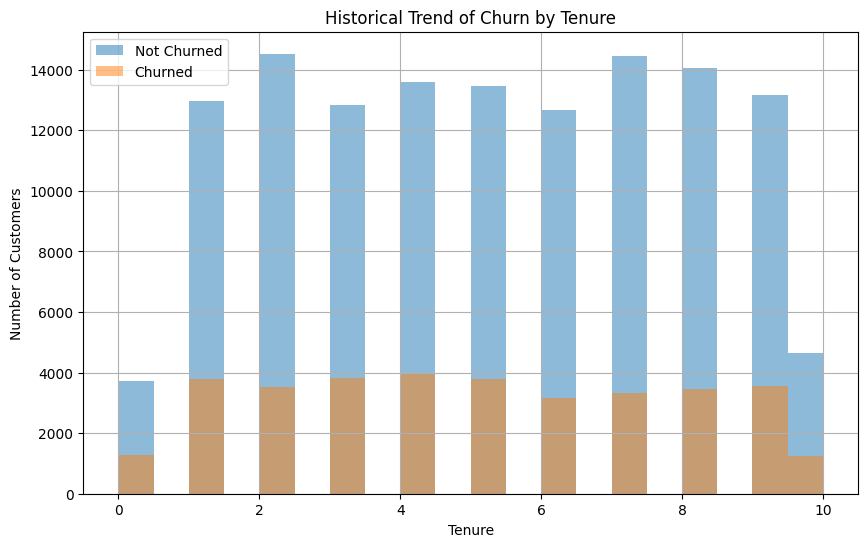

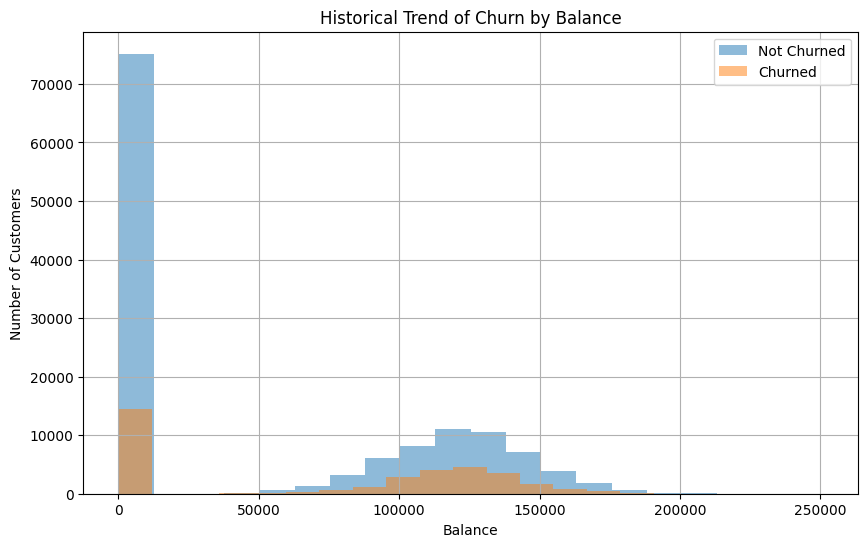

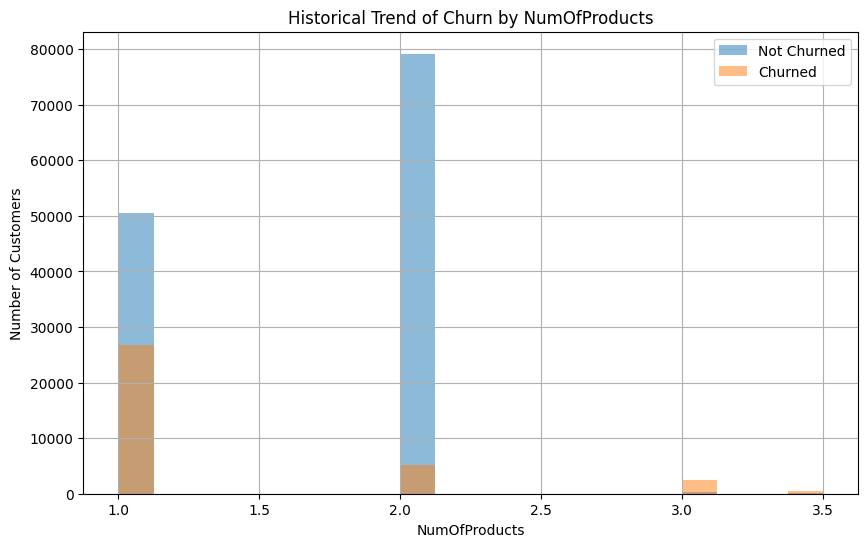

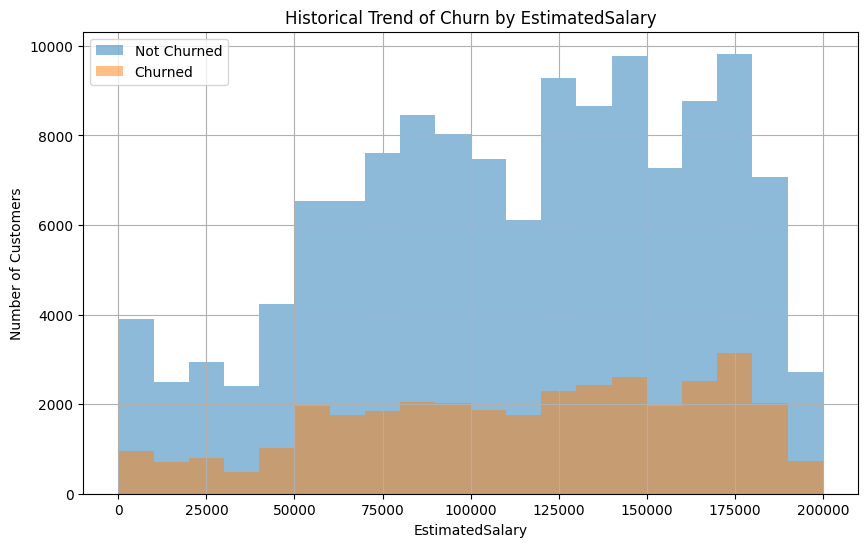

In [ ]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in numerical_features:

    churn_data = df[[feature, 'Exited']]


    plt.figure(figsize=(10, 6))
    plt.hist(churn_data[churn_data['Exited'] == 0][feature], bins=20, alpha=0.5, label='Not Churned')
    plt.hist(churn_data[churn_data['Exited'] == 1][feature], bins=20, alpha=0.5, label='Churned')

    plt.title(f'Historical Trend of Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Customers')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = a.drop('Exited', axis=1)
y = a['Exited']
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          id  CustomerId  CreditScore   Age  Tenure    Balance  NumOfProducts  \
0          0    15674932        668.0  33.0     3.0       0.00            2.0   
1          1    15749177        627.0  33.0     1.0       0.00            2.0   
2          2    15694510        678.0  40.0    10.0       0.00            2.0   
3          3    15741417        581.0  34.0     2.0  148882.54            1.0   
4          4    15766172        716.0  33.0     5.0       0.00            2.0   
...      ...         ...          ...   ...     ...        ...            ...   
70502  70502    15672516        545.0  51.0     7.0       0.00            1.0   
70503  70503    15702430        548.0  44.0    10.0       0.00            1.0   
70504  70504    15756056        541.0  30.0     7.0       0.00            1.0   
70505  70505    15576928        651.0  43.0     2.0       0.00            1.0   
70506  70506    15665110        509.0  44.0     5.0       0.00            2.0   

       HasCrCard  Estimated

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'🔹 Accuracy: {accuracy:.2f}')
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Accuracy: 0.79

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     26052
           1       0.00      0.00      0.00      6955

    accuracy                           0.79     33007
   macro avg       0.39      0.50      0.44     33007
weighted avg       0.62      0.79      0.70     33007



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


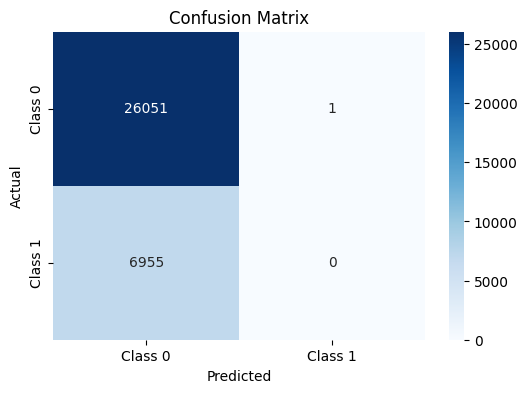

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from scipy.stats import skew
exclude_features = ['id', 'CustomerId']
for column in df.select_dtypes(include=['number']).columns:
    if column not in exclude_features:  # Check if the
            skewness = skew(df[column])
            print(f"Skewness of {column}: {skewness}")

Skewness of CreditScore: -0.059290680776909584
Skewness of Age: 0.9680539938699673
Skewness of Tenure: 0.006489747249592974
Skewness of Balance: 0.3820169761980373
Skewness of NumOfProducts: 0.368274632234982
Skewness of HasCrCard: -1.179244484108427
Skewness of EstimatedSalary: -0.309018731016704
Skewness of Exited: 1.412201831622667


In [ ]:
from scipy.stats import kurtosis

exclude_features = ['id', 'CustomerId']
for column in df.select_dtypes(include=['number']).columns:
    if column not in exclude_features:
        kurt = kurtosis(df[column])
        print(f"Kurtosis of {column}: {kurt}")

Kurtosis of CreditScore: -0.06748661469405359
Kurtosis of Age: 1.5323229710101716
Kurtosis of Tenure: -1.1579224541794402
Kurtosis of Balance: -1.6008397118608144
Kurtosis of NumOfProducts: -0.2780870651056251
Kurtosis of HasCrCard: -0.6093824466998492
Kurtosis of EstimatedSalary: -0.8388557225647251
Kurtosis of Exited: -0.005685986761585049


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91     26052
           1       0.69      0.49      0.57      6955

    accuracy                           0.85     33007
   macro avg       0.78      0.71      0.74     33007
weighted avg       0.83      0.85      0.83     33007


Confusion Matrix:
 [[24516  1536]
 [ 3578  3377]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4126/4126 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8062 - loss: 0.4584
Epoch 2/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.8398 - loss: 0.3722
Epoch 3/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8432 - loss: 0.3682
Epoch 4/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8446 - loss: 0.3671
Epoch 5/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8448 - loss: 0.3654
Epoch 6/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8447 - loss: 0.3661
Epoch 7/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.8433 - loss: 0.3660
Epoch 8/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8453 - loss: 0.3629
Epoch 9/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8451 - loss: 0.3624
Epoch 10/10
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8420 - loss: 0.3655
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8443 - loss: 0.3597
Test Loss: 0.3625
Test Accuracy: 0.8444


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='linear')
X_train_2d = X_train.values.reshape(X_train.shape[0], -1)
X_test_2d = X_test.values.reshape(X_test.shape[0], -1)
svm_model.fit(X_train_2d, y_train)

y_pred = svm_model.predict(X_test_2d)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     11174
         1.0       0.00      0.00      0.00      2928

    accuracy                           0.79     14102
   macro avg       0.40      0.50      0.44     14102
weighted avg       0.63      0.79      0.70     14102


Confusion Matrix:
 [[11174     0]
 [ 2928     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import xgboost as xgb
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     26052
           1       0.68      0.50      0.58      6955

    accuracy                           0.85     33007
   macro avg       0.78      0.72      0.74     33007
weighted avg       0.84      0.85      0.84     33007


Confusion Matrix:
 [[24444  1608]
 [ 3465  3490]]


In [ ]:
import pandas as pd

data = {
    'Model': ['SVM', 'RandomForest', 'XGBoost', 'LSTM'],
    'Accuracy': [0.79, 0.85, 0.85, 0.84]
}

comparison_df = pd.DataFrame(data)
best_model_index = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_index, 'Model']

print(f"The best-performing model is: {best_model}")

The best-performing model is: RandomForest


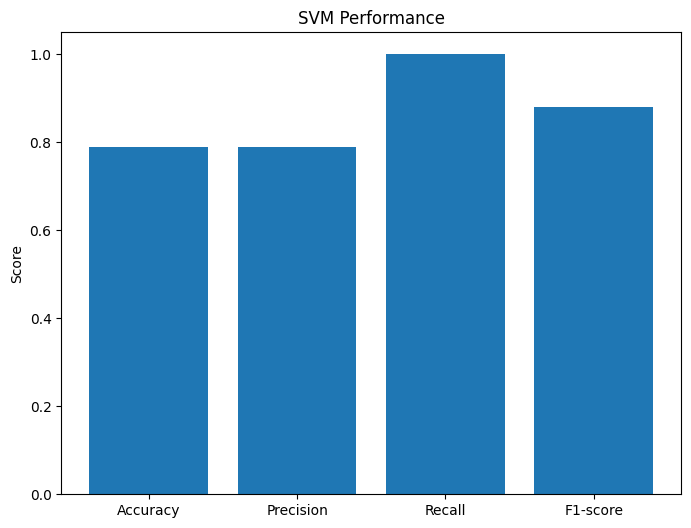

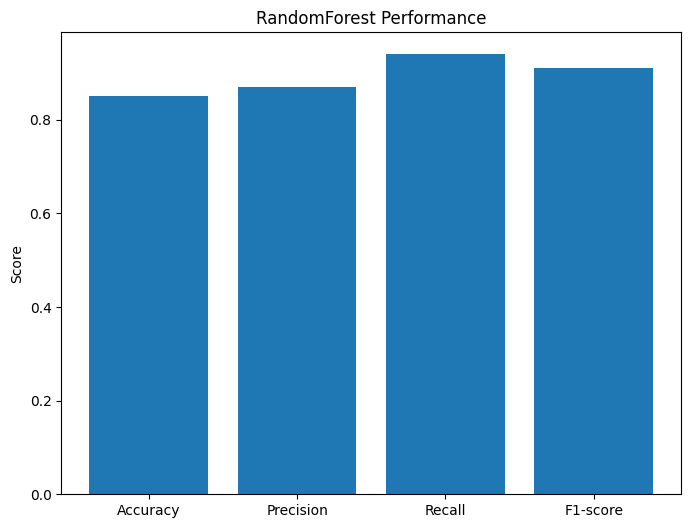

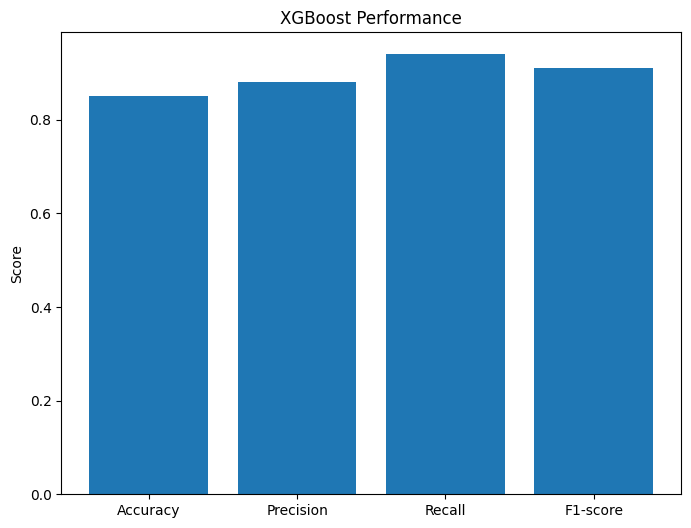

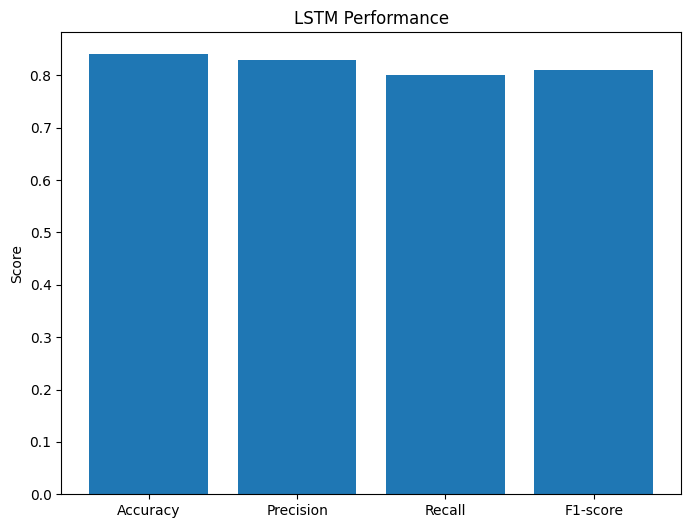

The best-performing model is: RandomForest


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = {
    'Model': ['SVM', 'RandomForest', 'XGBoost', 'LSTM'],
    'Accuracy': [0.79, 0.85, 0.85, 0.84],
    'Precision': [0.79, 0.87, 0.88, 0.83],
    'Recall': [1.0, 0.94, 0.94, 0.80],
    'F1-score': [0.88, 0.91, 0.91, 0.81]
}
comparison_df = pd.DataFrame(data)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for model in comparison_df['Model']:
    fig, ax = plt.subplots(figsize=(8, 6))
    model_data = comparison_df[comparison_df['Model'] == model][metrics].values.flatten()
    ax.bar(metrics, model_data)
    ax.set_title(f'{model} Performance')
    ax.set_ylabel('Score')
    plt.show()
best_model_index = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_index, 'Model']

print(f"The best-performing model is: {best_model}")

In [ ]:
import numpy as np
from scipy.stats import norm
def z_test(acc1, acc2, n=200):
    """Performs Z-test between two model accuracies"""
    p1, p2 = acc1, acc2
    p = (p1 + p2) / 2
    se = np.sqrt(p * (1 - p) * (2 / n))
    z = (p1 - p2) / se
    p_value = 1 - norm.cdf(abs(z))
    return z, p_value

models = {'SVM': 0.79, 'Random Forest': 0.85, 'XGBoost': 0.85, 'LSTM': 0.84}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

print("\nZ-Test Results:")
for model1 in models:
    for model2 in models:
        if model1 != model2:
            z, p = z_test(models[model1], models[model2])
            print(f"{model1} vs {model2} → Z-score: {z:.4f}, P-value: {p:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")


Model Accuracies:
SVM: 0.7900
Random Forest: 0.8500
XGBoost: 0.8500
LSTM: 0.8400

Z-Test Results:
SVM vs Random Forest → Z-score: -1.5617, P-value: 0.0592
SVM vs XGBoost → Z-score: -1.5617, P-value: 0.0592
SVM vs LSTM → Z-score: -1.2877, P-value: 0.0989
Random Forest vs SVM → Z-score: 1.5617, P-value: 0.0592
Random Forest vs XGBoost → Z-score: 0.0000, P-value: 0.5000
Random Forest vs LSTM → Z-score: 0.2763, P-value: 0.3912
XGBoost vs SVM → Z-score: 1.5617, P-value: 0.0592
XGBoost vs Random Forest → Z-score: 0.0000, P-value: 0.5000
XGBoost vs LSTM → Z-score: 0.2763, P-value: 0.3912
LSTM vs SVM → Z-score: 1.2877, P-value: 0.0989
LSTM vs Random Forest → Z-score: -0.2763, P-value: 0.3912
LSTM vs XGBoost → Z-score: -0.2763, P-value: 0.3912

Best Model: Random Forest with accuracy 0.8500


In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def t_test(acc1, acc2, n=200):
    """Performs T-test between two model accuracies"""
    sample1 = np.random.binomial(n, acc1, size=1000) / n
    sample2 = np.random.binomial(n, acc2, size=1000) / n

    t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False)
    return t_stat, p_value
models = {'SVM': 0.79, 'Random Forest': 0.85, 'Logistic regression': 0.79}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

print("\nT-Test Results:")
for model1 in models:
    for model2 in models:
        if model1 != model2:
            t_stat, p = t_test(models[model1], models[model2])
            print(f"{model1} vs {model2} → T-score: {t_stat:.4f}, P-value: {p:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")



Model Accuracies:
SVM: 0.7900
Random Forest: 0.8500
Logistic regression: 0.7900

T-Test Results:
SVM vs Random Forest → T-score: -49.6775, P-value: 0.0000
SVM vs Logistic regression → T-score: -0.1259, P-value: 0.8998
Random Forest vs SVM → T-score: 49.9654, P-value: 0.0000
Random Forest vs Logistic regression → T-score: 49.0216, P-value: 0.0000
Logistic regression vs SVM → T-score: -0.1744, P-value: 0.8616
Logistic regression vs Random Forest → T-score: -48.5133, P-value: 0.0000

Best Model: Random Forest with accuracy 0.8500


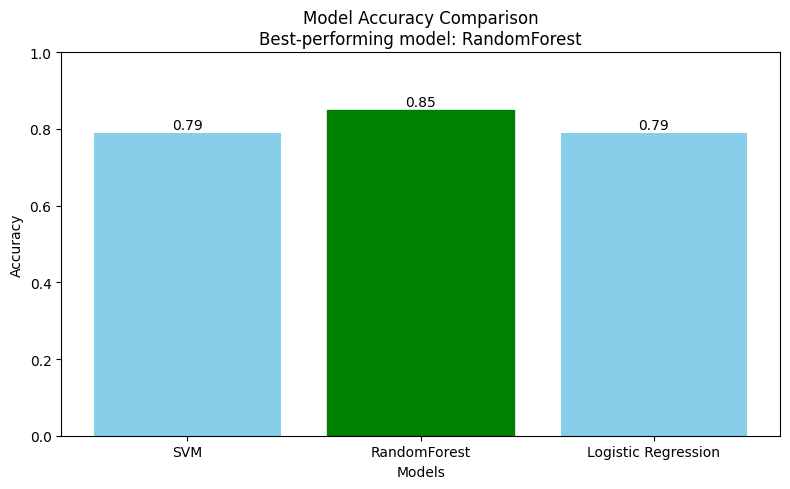

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Model': ['SVM', 'RandomForest', 'Logistic Regression'],
    'Accuracy': [0.79, 0.85, 0.79]
}

# Create DataFrame
comparison_df = pd.DataFrame(data)

# Find the best model
best_model_index = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_index, 'Model']

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')

# Highlight the best model
bars[best_model_index].set_color('green')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title(f'Model Accuracy Comparison\nBest-performing model: {best_model}')
plt.ylim(0, 1.0)

# Show values on top of bars
for i, acc in enumerate(comparison_df['Accuracy']):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.stats import norm

def z_test(acc, baseline=0.80, n=200):
    std_error = np.sqrt((baseline * (1 - baseline)) / n)
    z_score = (acc - baseline) / std_error
    p_value = 2 * norm.sf(abs(z_score))  # two-tailed
    return z_score, p_value

models = {
    'SVM': 0.79,
    'Random Forest': 0.85,
    'Logistic Regression': 0.79
}

# Header
print(f"{'':35s}{'Z-score':>15s}{'P-score':>15s}")

# Z-test results
for model, acc in models.items():
    z, p = z_test(acc)
    print(f"{model:35s}{z:15.4f}{p:15.4f}")


                                           Z-score        P-score
SVM                                        -0.3536         0.7237
Random Forest                               1.7678         0.0771
Logistic Regression                        -0.3536         0.7237


In [ ]:
import numpy as np
from scipy.stats import ttest_1samp

def t_test_model(acc, baseline=0.80, n=200):
    # Generate simulated accuracies using a binomial distribution
    sample = np.random.binomial(n, acc, size=1000) / n
    t_stat, p_value = ttest_1samp(sample, baseline)
    return t_stat, p_value

# Model accuracies
models = {
    'SVM': 0.79,
    'Random Forest': 0.85,
    'Logistic Regression': 0.79
}

# Print table header
print(f"{'':35s}{'T-score':>15s}{'P-score':>15s}")

# Perform T-tests and print results
for model, acc in models.items():
    t, p = t_test_model(acc)
    print(f"{model:35s}{t:15.4f}{p:15.4f}")


                                           T-score        P-score
SVM                                       -11.6655         0.0000
Random Forest                              61.1721         0.0000
Logistic Regression                        -9.9582         0.0000
